In [2]:
!pip install keras-vggface


     -------------------------------------- 152.8/152.8 kB 1.8 MB/s eta 0:00:00


In [4]:
!pip install keras_applications


     ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00


In [6]:
!pip install --upgrade keras


In [12]:
pip install keras==2.2.4


     -------------------------------------- 312.5/312.5 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.2.4 which is incompatible.


In [8]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input


In [15]:
pip install tensorflow scikit-learn matplotlib

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [36]:
import os
import numpy as np
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [37]:
# Model initialization
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [38]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [39]:
def compute_similarity_with_preprocessed(random_features, celebrity_features):
    return cosine_similarity(random_features.reshape(1, -1), np.vstack(celebrity_features))[0]


In [48]:
def preprocess_celebrity_images(celebrity_folder):
    images = []
    for image_name in os.listdir(celebrity_folder):
        image_path = os.path.join(celebrity_folder, image_name)
        try:
            img = load_and_preprocess_image(image_path)
            features = model.predict(img)
            images.append({
                'path': image_path,
                'features': features
            })
        except Exception as e:
            print(f"An error occurred while processing {image_path}: {e}")
    return images


In [54]:
def preprocess_and_save_features(folder_path, output_file):
    celebrity_images = {}
    celebrity_folders = [os.path.join(folder_path, celebrity_name) for celebrity_name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, celebrity_name))]
    
    for celebrity_folder in celebrity_folders:
        celebrity_name = os.path.basename(celebrity_folder)
        images = preprocess_celebrity_images(celebrity_folder)
        celebrity_images[celebrity_name] = images

    with open(output_file, 'wb') as file:
        pickle.dump(celebrity_images, file)

    print(f"Features have been preprocessed and saved to {output_file}")

In [55]:
def load_preprocessed_features(file_path):
    with open(file_path, 'rb') as file:
        celebrity_images = pickle.load(file)
    return celebrity_images

In [56]:
def display_images(random_image_path, celebrity_image_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    random_img = mpimg.imread(random_image_path)
    ax1.imshow(random_img)
    ax1.axis('off')
    ax1.set_title('Random Image')

    celebrity_img = mpimg.imread(celebrity_image_path)
    ax2.imshow(celebrity_img)
    ax2.axis('off')
    ax2.set_title('Matching Celebrity')

    plt.show()

In [57]:
# Example usage
folder_path = 'Celebrity Faces Dataset'  # Replace with the path to your dataset
preprocessed_features_file = 'celebrityfacemodel.pkl'
random_image_path = "D:/New folder/photos/New folder/11.jpg"  

In [59]:
# Check if preprocessed features exist, load if available
if not os.path.exists(preprocessed_features_file):
    preprocess_and_save_features(folder_path, preprocessed_features_file)
else:
    celebrity_images = load_preprocessed_features(preprocessed_features_file)

1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 71ms/step
Features have been preprocessed and saved to celebrityfacemodel.pkl


In [61]:
random_image_path = "C:/Users/Admin/OneDrive/Pictures/Screenshots/prathamesh.png"  
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result
if best_match is not None:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

1/1 [==============================] - 0s 94ms/step


NameError: name 'celebrity_images' is not defined

In [62]:
# Check if preprocessed features exist, load if available
if not os.path.exists(preprocessed_features_file):
    preprocess_and_save_features(folder_path, preprocessed_features_file)
    celebrity_images = load_preprocessed_features(preprocessed_features_file)  # Load celebrity_images
else:
    celebrity_images = load_preprocessed_features(preprocessed_features_file)


In [63]:
random_image_path = "C:/Users/Admin/OneDrive/Pictures/Screenshots/prathamesh.png"

1/1 [==============================] - 0s 70ms/step
The celebrity that matches the most is: Leonardo DiCaprio


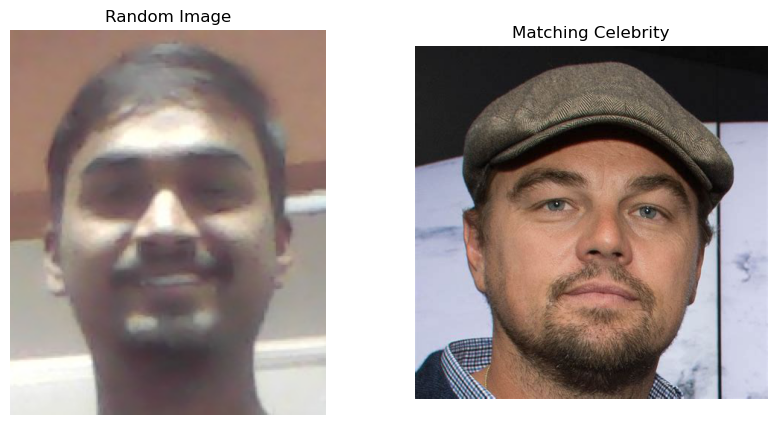

In [64]:
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result
if best_match is not None:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

1/1 [==============================] - 0s 79ms/step
The celebrity that matches the most is: Sandra Bullock


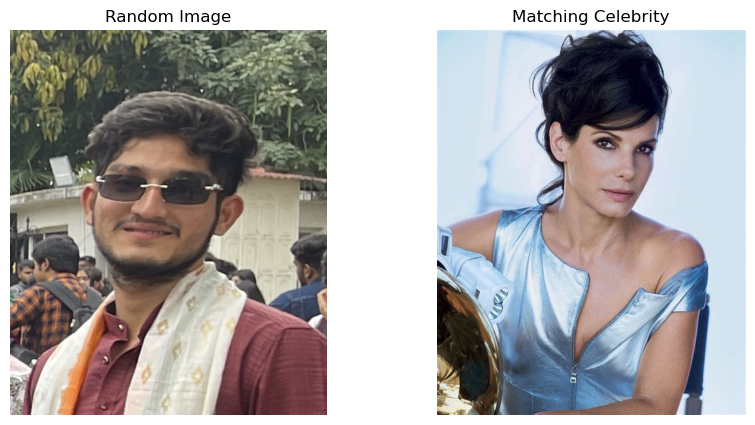

In [65]:
random_image_path = "C:/Users/Admin/Downloads/raghu.JPG"
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result
if best_match is not None:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

SyntaxError: unexpected character after line continuation character (1132951368.py, line 1)

1/1 [==============================] - 0s 70ms/step
The celebrity that matches the most is: Brad Pitt


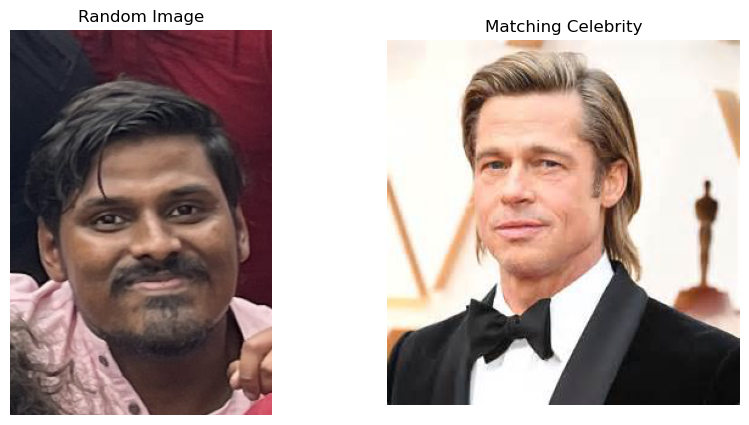

In [67]:
random_image_path = "C:/Users/Admin/Downloads/WhatsApp Image 2023-10-13 at 12.47.33 PM.jpeg"
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result
if best_match is not None:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

1/1 [==============================] - 0s 135ms/step
The celebrity that matches the most is: Nicole Kidman


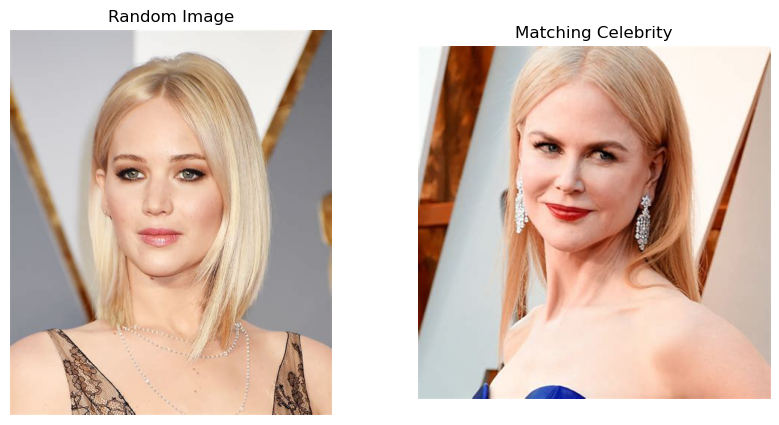

In [68]:

random_image_path = "C:/Users/Admin/Celebrity Faces Dataset/Jennifer Lawrence/015_48a3c3ec.jpg"
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result
if best_match is not None:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')    

1/1 [==============================] - 0s 142ms/step
The celebrity that matches the most is: Nicole Kidman


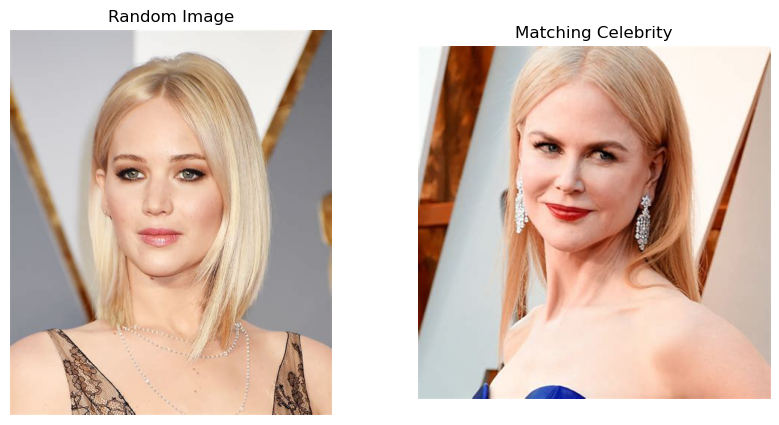

In [69]:
random_image_path = "C:/Users/Admin/Celebrity Faces Dataset/Jennifer Lawrence/015_48a3c3ec.jpg"
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)
# Set the similarity threshold
similarity_threshold = 0.4  # You can adjust this value as needed

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result based on the similarity threshold
if best_match is not None and max_similarity > similarity_threshold:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

In [71]:
random_image_path =  "C:/Users/Admin/Downloads/WhatsApp Image 2023-10-13 at 12.47.33 PM.jpeg"
# Load and preprocess the random image
random_img = load_and_preprocess_image(random_image_path)
random_features = model.predict(random_img)
# Set the similarity threshold
similarity_threshold = 0.4  # You can adjust this value as needed

# Find the best matching celebrity
best_match = None
max_similarity = -1

for celebrity_name, images in celebrity_images.items():
    celebrity_features = [image_data['features'] for image_data in images]
    similarities = compute_similarity_with_preprocessed(random_features, celebrity_features)
    avg_similarity = np.mean(similarities)

    if avg_similarity > max_similarity:
        max_similarity = avg_similarity
        best_match = (celebrity_name, images[np.argmax(similarities)]['path'])

# Display the result based on the similarity threshold
if best_match is not None and max_similarity > similarity_threshold:
    celebrity_name, celebrity_image_path = best_match
    print(f'The celebrity that matches the most is: {celebrity_name}')
    display_images(random_image_path, celebrity_image_path)
else:
    print('No matching celebrity found')

1/1 [==============================] - 0s 137ms/step
No matching celebrity found
